## How well do jobs and skills pay for Data Analysts?
### Methology

1.Evaluate median salary for top 6 data jobs
2.Find median salary per skill for Data Analysts
3.Visualize for highest paying skills and most demanded skills

### Original Exploration
[Matplotlib_Boxplots.ipynb]()

[Exercise_Skill_pay_analysis.ipynb]()

## Import Libraries and Data

In [ ]:
#importing Libraries
import ast 
import seaborn as sns
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Salary Distribution by Job Title
Filter our data to only include salary values from the United States.

In [2]:
#fileter for the job_titles and Country

df_US = df[df['job_country']== 'United States'].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [3]:
job_titles = df_US['job_title_short'].value_counts().index[:6].to_list()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_US_top6=df_US[df_US['job_title_short'].isin(job_titles)]

In [9]:
job_order=df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending= False).index

### Plot Salary Distributions
Plot the top 6 job titles salary distributions using a box plot.



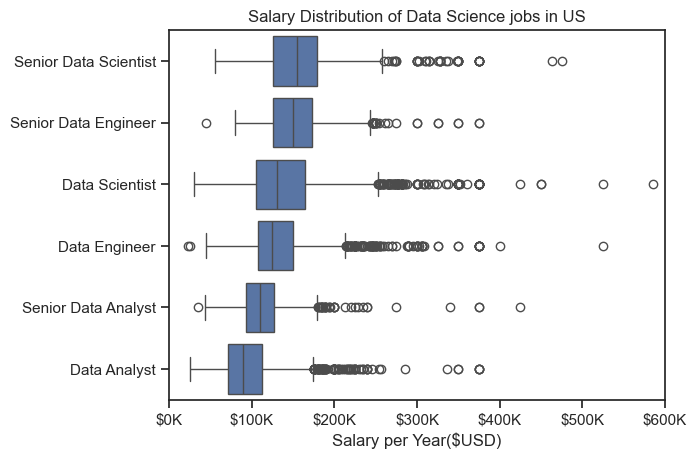

In [10]:
sns.boxplot(data= df_US_top6, x= 'salary_year_avg', y = 'job_title_short', order=job_order)

ax= plt.gca()
sns.set_theme(style='ticks')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K' ))

plt.title('Salary Distribution of Data Science jobs in US')
plt.xlabel('Salary per Year($USD)')
plt.xlim(0,600000)
plt.ylabel('')
plt.show()

## Investigate Median Salary vs Skill for Data Analyst
Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'United States', to create a new DataFrame df_DA_US. Drop NaN values from the 'salary_year_avg' column. Then it uses the explode method on the job_skills column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the salary_year_avg and job_skills columns.

In [12]:
df_DA_US= df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_DA_US=df_DA_US.dropna(subset=('job_skills'))

In [13]:
df_DA_US= df_DA_US.explode('job_skills')

## Determine The Highest Paid Skills and Most Demanded Skills
Gets the top ten highest-paying skills for Data Analysts by calculating the median salary for each skill listed in the df_DA_US. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame (df_DA_top_pay) with a reset index and a renamed salary column labeled 'median_salary'.

In [28]:
df_DA_top_pay=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values( by= 'median',ascending=False)

df_DA_top_pay =df_DA_top_pay.head(10)

Calculates the count and median salary for each skill in df_DA_US. It groups the data by job_skills, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [23]:
df_DA_skills=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values( by= 'count',ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median',ascending =False)

df_DA_skills



,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


### Creates two horizontal bar charts:

    1.Displays the highest paid skills
    2.Shows the most in demand skills

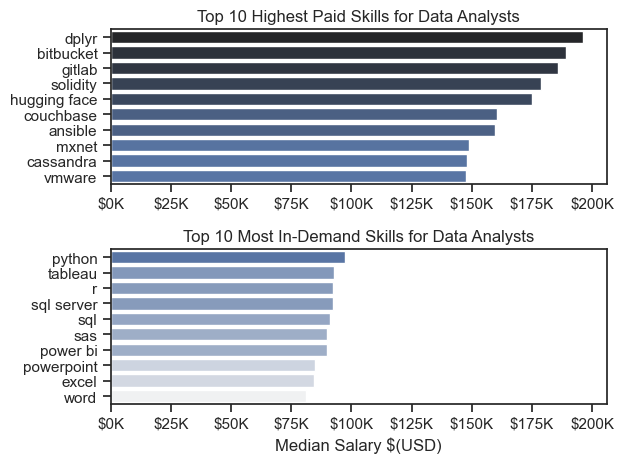

In [35]:


fig , ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data= df_DA_top_pay, x ='median', y = df_DA_top_pay.index, ax =ax[0], hue ='median', palette= 'dark:b_r')

ax[0].legend().remove()

#df_DA_top_pay[::-1].plot(kind = 'barh', y = 'median' , ax = ax[0]) -- For  inverting axis



ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data= df_DA_skills, x ='median', y = df_DA_skills.index,hue ='median', ax =ax[1], palette= 'light:b')

ax[1].legend().remove()



ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary $(USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()
